In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from scipy import stats

In [2]:
df = pd.read_csv("HospitalAdmissionsData.csv")

In [3]:
#What are the column headers or features in this data set?
for i in df.columns:
    print (i)

ID
AdmissionLengthDays
Death_1
Admission_Type
Insurance_Type
EnglishLanguage_1
Religion_Type
Married_1
Race
Dx


In [4]:
#How many features are floats? How many are integers?
#Which features are objects (non-numeric variables)?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [5]:
#What are the possible 'values' for insurance type?
for i in df["Insurance_Type"].unique():
    print(i)

private
medicare
government
medicaid
self pay


In [6]:
#Show the summary statistics for the admission length.
df["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [7]:
#What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
print("Admission: ", df["Admission_Type"].value_counts().max())
print("Insurance: ", df["Insurance_Type"].value_counts().max())
print("Religion: ", df["Religion_Type"].value_counts().max())
print("Race: ", df["Race"].value_counts().max())
print("Dx: ", df["Dx"].value_counts().max())

Admission:  41987
Insurance:  28157
Religion:  20561
Race:  40927
Dx:  7823


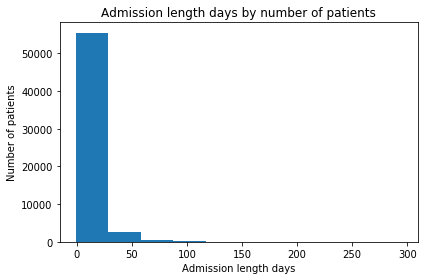

In [8]:
#Show a histogram for admission days
import numpy as np
import matplotlib.pyplot as plt

df.hist(column = "AdmissionLengthDays", grid = False)
plt.title("Admission length days by number of patients")
plt.xlabel('Admission length days')
plt.ylabel('Number of patients')
plt.tight_layout()

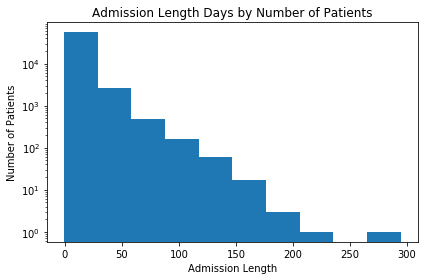

In [9]:
#Show a histogram for days on a log scale
import numpy as np
import matplotlib.pyplot as plt

df.hist(column = "AdmissionLengthDays",label = True, sharex = True, grid = False)
plt.title("Admission Length Days by Number of Patients")
plt.xlabel("Admission Length in Days")
plt.ylabel("Number of Patients")
plt.yscale('log', nonposy='clip')

plt.tight_layout()

In [10]:
#Describe what you see

#Answer: I see that most of the patients stayed for a relatively short period of time (<25 days).
#The data isn't spread out that much

Text(0.5, 0, 'Survival Status (1 = Dead)')

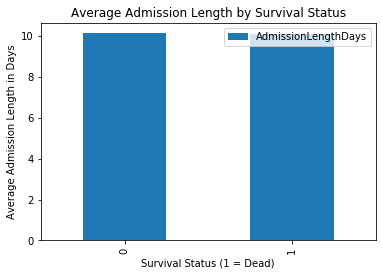

In [11]:
trainbar = df.groupby('Death_1').mean()
trainbar.plot.bar(y = ['AdmissionLengthDays'])
plt.title('Average Admission Length by Survival Status')
plt.ylabel("Average Admission Length in Days")
plt.xlabel("Survival Status (1 = Dead)")

In [24]:
#Describe the association between death and insurance type and show a visualization or test

x = df[df["Insurance_Type"] == "private"]
print("Private: ", x["Death_1"].mean())

x = df[df["Insurance_Type"] == "government"]
print("Government: ", x["Death_1"].mean())

x = df[df["Insurance_Type"] == "medicare"]
print("Medicare: ", x["Death_1"].mean())

x = df[df["Insurance_Type"] == "medicaid"]
print("Medicaid: ", x["Death_1"].mean())

#Answer: People with Medicaid were twice as likely to die as everyone else

Private:  0.06132954646312239
Government:  0.05053340819764177
Medicare:  0.13865113470895338
Medicaid:  0.065905552672548
